# Exercice: empreinte environnementale du Luxembourg
Nous nous penchons ici sur le calcul de l'empreinte environnementale du Luxembourg, c'est-à-dire l'ensemble des impacts environnementaux liés à la consommation finale du pays.

Points d'attention de ce notebook
- carbone
- eau
- occupation des sols
- énergie primaire

Nous nous focalisersons sur la comparison entre empreinte territoriale et consommation.


In [1]:
import pymrio as mr   # manipulation des données input-output
import pandas as pd   # manipulation de tables et jeux de données
import numpy as np    # opérations communes
import seaborn as sns # production de figures, add-on à matplotlib
import matplotlib.pyplot as plt # production de figures
import os # opérations sur le système de fichiers

In [2]:
# Si vous voulez enregistrer/charger rapidement
import pickle

In [3]:
year = 2019
EXIOBASE_PATH = '../EXIOBASE/' # ne pas hésiter à changer

In [4]:
# Chargement rapide des données IO
with open(EXIOBASE_PATH + f'IOT_{year}_ixi.pickle', 'rb') as handle:
    io = pickle.load(handle)

## Rapports environnementaux

Lors du premier calcul, les rapports environnementaux sont générés automatiquement, ils se composent de:
- `D_pba`: impacts directs annuels, (pba = production-based accounts) strictement équivalente à `F`,
- `D_cba`: empreintes annuelles, (cba = consumption-based accounts),
- `D_imp`: impacts liés aux importations,
- `D_exp`: impacts liés aux exportations,

Par définition, $$D_{cba} = D_{pba} + D_{imp} - D_{exp}$$

Ces rapports existent en différentes agrégations:
- `D_pba_reg` et `D_cba_reg`: impacts totaux par région,
- `D_pba_cap` et `D_cba_cap`: impacts per capita.

## Simple empreinte carbone

Définissons l'indicateur pertinent pour l'empreinte carbone.

In [5]:
ind = 'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)'

In [58]:
pba = io.impacts.D_pba_reg.loc[ind,'LU'] / 1e9
pba_cap = io.impacts.D_pba_cap.loc[ind,'LU']

print(pba, pba_cap)

11.712785865799999 19014.262769155845


Les émissions de production du Luxembourg s'élèvent à 11.7 Mt CO$_2$ eq. pour l'année 2019.

In [59]:
cba = io.impacts.D_cba_reg.loc[ind,'LU'] / 1e9
cba_cap = io.impacts.D_pba_cap.loc[ind,'LU']

cba

18.2413553817

Les émissions liées à la consommation finale du pays (empreinte carbone) s'élèvent à 18.2 Mt CO$_2$ eq. pour l'année 2019.

In [60]:
imp = io.impacts.D_imp_reg.loc[ind,'LU'] / 1e9
imp_cap = io.impacts.D_pba_cap.loc[ind,'LU']

imp

15.6129498123

In [61]:
exp = io.impacts.D_exp_reg.loc[ind,'LU'] / 1e9
exp_cap = io.impacts.D_pba_cap.loc[ind,'LU']

exp

9.084380296379999

Les émissions liées aux importations et aux exportations s'élèvent à 15.6 et 9.1 Mt CO$_2$ eq. pour l'année 2019 respectivement.

In [94]:
# Créons un tableau qui servira de base à un graphique, plus lisible
values = [pba,
          imp,
          exp,
          cba]

values_cap = [pba_cap,
              imp_cap,
              exp_cap,
              cba_cap]

empreinte_LU_2019 = pd.DataFrame(values,
             index=['Production', 'Imports', 'Exports', 'Consommation'], 
             columns = ['GHG [Mt CO2 eq.]'])

empreinte_LU_2019_cap = pd.DataFrame(values_cap,
             index=['Production', 'Imports', 'Exports', 'Consommation'], 
             columns = ['GHG per capita [t CO2 eq./cap]'])

empreinte_LU_2019

,GHG [Mt CO2 eq.]
Production,11.712786
Imports,15.612950
Exports,9.084380
Consommation,18.241355


In [95]:
empreinte_LU_2019['_'] = [0, pba, cba, 0]
empreinte_LU_2019_cap['_'] = [0, pba_cap, cba_cap, 0]

In [96]:
empreinte_LU_2019.columns = pd.CategoricalIndex(empreinte_LU_2019.columns.values, 
                                 ordered=True, 
                                 categories=['_','GHG [Mt CO2 eq.]'])
empreinte_LU_2019_cap.columns = pd.CategoricalIndex(empreinte_LU_2019_cap.columns.values, 
                                 ordered=True, 
                                 categories=['_','GHG per capita [t CO2 eq./cap]'])
empreinte_LU_2019 = empreinte_LU_2019.sort_index(axis=1)
empreinte_LU_2019_cap = empreinte_LU_2019_cap.sort_index(axis=1)

Text(0, 0.5, 't CO2 eq./cap')

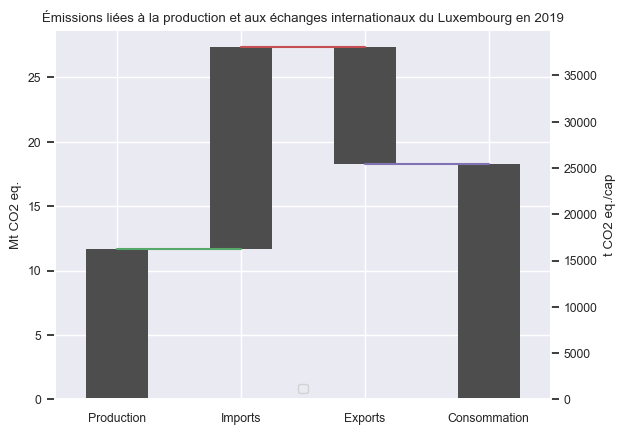

In [118]:
ax = empreinte_LU_2019.plot.bar(stacked=True, color=((.5,.5,.5,0),(.3,.3,.3,1)), lw=0)

ax2 = empreinte_LU_2019_cap.plot(ax=ax, secondary_y=True, lw=0)

ax.plot((0,1),(pba,pba))
ax.plot((1,2),(pba+imp,pba+imp))
ax.plot((2,3),(cba,cba))

ax.set_title('Émissions liées à la production et aux échanges internationaux du Luxembourg en 2019')
ax.legend([], loc='lower center')
ax.set_ylabel('Mt CO2 eq.')
ax2.set_ylim((0, ax.get_ylim()[1] / (pba+imp) * (pba_cap+imp_cap)))
ax2.set_ylabel('t CO2 eq./cap')

In [191]:
pba_all = io.impacts.D_pba.loc[ind,'LU'] * 1e-9
imp_all = io.impacts.D_imp.loc[ind,'LU'] * 1e-9
exp_all = io.impacts.D_exp.loc[ind,'LU'] * 1e-9
cba_all = io.impacts.D_cba.loc[ind,'LU'] * 1e-9

values_all = [pba_all,
              imp_all,
              exp_all,
              cba_all]

empreinte_LU_2019_all = pd.concat(values_all, axis=1, keys=['Production', 'Imports', 'Exports', 'Consommation'])

In [192]:
empreinte_LU_2019_all.loc['_'] = [0, pba, cba, 0]

In [193]:
direct = io.impacts.F_Y.loc[ind,'LU'].sum() * 1e-9

In [194]:
empreinte_LU_2019_all.loc['DIRECT'] = [direct, 0, 0, direct]

In [195]:
colors = {'_':(0,0,0,0)}

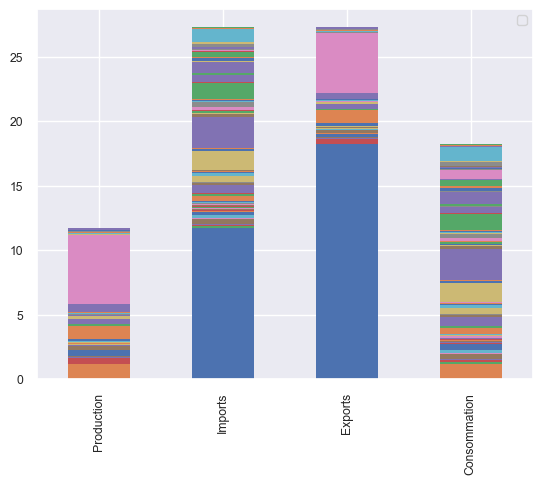

In [196]:
empreinte_LU_2019_all.index = pd.CategoricalIndex(empreinte_LU_2019_all.index.values, 
                    ordered=True, 
                    categories=['_'] + ['DIRECT'] + pba_all.index.tolist())

empreinte_LU_2019_all = empreinte_LU_2019_all.sort_index(axis=0)

ax = empreinte_LU_2019_all.T.plot.bar(stacked=True, lw=0)

colors = dict()

for i, index in enumerate(empreinte_LU_2019_all.index):
    color = ax.patches[i].get_facecolor()
    colors[index] = color

colors['_'] = (0,0,0,0)

ax.legend([])

Text(0, 0.5, 't CO2 eq./cap')

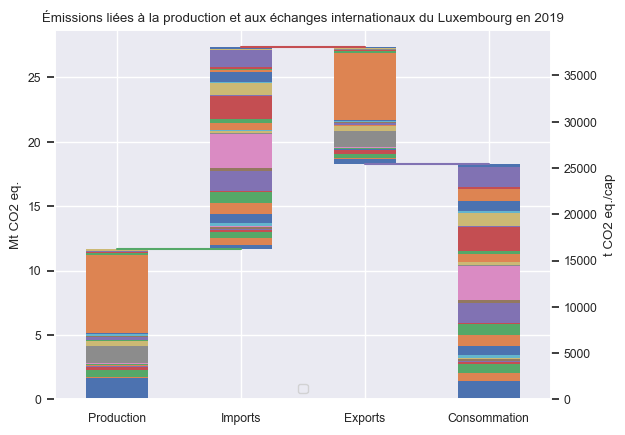

In [200]:
ax = empreinte_LU_2019_all.T.plot.bar(stacked=True, lw=0, color=colors)
ax2 = empreinte_LU_2019_cap.plot(ax=ax, secondary_y=True, lw=0)

ax.plot((0,1),(pba,pba))
ax.plot((1,2),(pba+imp,pba+imp))
ax.plot((2,3),(cba,cba))

ax.set_title('Émissions liées à la production et aux échanges internationaux du Luxembourg en 2019')
ax.legend([], loc='lower center')
ax.set_ylabel('Mt CO2 eq.')
ax2.set_ylim((0, ax.get_ylim()[1] / (pba+imp) * (pba_cap+imp_cap)))
ax2.set_ylabel('t CO2 eq./cap')

In [202]:
empreinte_LU_2019_all['Production'].nlargest(5)

Air transport (62)                   5.406951
DIRECT                               1.177343
Re-processing of ash into clinker    0.986475
Sea and coastal water transport      0.623233
Cattle farming                       0.481158
Name: Production, dtype: float64

In [199]:
empreinte_LU_2019_all['Imports'].nlargest()

_                                                                 11.712786
Chemicals nec                                                      2.347387
Petroleum Refinery                                                 1.519282
Manufacture of motor vehicles, trailers and semi-trailers (34)     1.258220
Health and social work (85)                                        1.015093
Name: Imports, dtype: float64

In [203]:
empreinte_LU_2019_all['Consommation'].nlargest()

Chemicals nec                                                     2.354041
Petroleum Refinery                                                1.519431
Manufacture of motor vehicles, trailers and semi-trailers (34)    1.259415
DIRECT                                                            1.177343
Health and social work (85)                                       1.061829
Name: Consommation, dtype: float64

## Autres empreintes

In [15]:
# Ne gardons que les indicateurs qui nous intéressent
indicateurs = [
    'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)',
    'Water Consumption Blue - Total',
    'Unused Domestic Extraction - Oil and Gas',
    'Domestic Extraction Used - Non-metalic Minerals',
    'Domestic Extraction Used - Iron Ore',
    'Domestic Extraction Used - Non-ferous metal ores'
]

In [16]:
# Quelles sont les unités des différents indicateurs? 
io.impacts.unit.loc[indicateurs]

,unit
impact,
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
Water Consumption Blue - Total,Mm3
Unused Domestic Extraction - Oil and Gas,kt
Domestic Extraction Used - Non-metalic Minerals,kt
Domestic Extraction Used - Iron Ore,kt
Domestic Extraction Used - Non-ferous metal ores,kt


In [17]:
io.impacts.D_pba_reg.loc[indicateurs, 'LU']

impact
GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)    1.171279e+10
Water Consumption Blue - Total                                                                    1.189350e+01
Unused Domestic Extraction - Oil and Gas                                                          0.000000e+00
Domestic Extraction Used - Non-metalic Minerals                                                   9.928879e+02
Domestic Extraction Used - Iron Ore                                                               0.000000e+00
Domestic Extraction Used - Non-ferous metal ores                                                  0.000000e+00
Name: LU, dtype: float64

In [18]:
# Curieux qu'il y ait de l'extraction de "minéraux" au Luxembourg, allons voir
minerals = [s for s in io.satellite.unit.index if 'Non-Metallic Minerals' in s]

In [19]:
[s for s in io.impacts.unit.index if 'Domestic' in s]

['Unused Domestic Extraction',
 'Water Consumption Blue - Domestic',
 'Water Withdrawal Blue - Domestic',
 'Domestic Extraction Used - Crop and Crop Residue',
 'Domestic Extraction Used - Grazing and Fodder',
 'Domestic Extraction Used - Forestry and Timber',
 'Domestic Extraction Used â\x80\x93 Fisheries',
 'Domestic Extraction Used - Non-metalic Minerals',
 'Domestic Extraction Used - Iron Ore',
 'Domestic Extraction Used - Non-ferous metal ores',
 'Unused Domestic Extraction - Crop and Crop Residue',
 'Unused Domestic Extraction - Grazing and Fodder',
 'Unused Domestic Extraction - Forestry and Timber',
 'Unused Domestic Extraction â\x80\x93 Fisheries',
 'Unused Domestic Extraction - Coal and Peat',
 'Unused Domestic Extraction - Oil and Gas',
 'Unused Domestic Extraction - Non-metalic Minerals',
 'Unused Domestic Extraction - Iron Ore',
 'Unused Domestic Extraction - Non-ferous metal ores']

In [20]:
# Nous pouvons utiliser les comptes "satellite" (plutôt que "impacts") pour l'information désagrégée
io.satellite.D_pba_reg.loc[minerals, 'LU']

stressor
Domestic Extraction Used - Non-Metallic Minerals - Building stones                           0.000000
Domestic Extraction Used - Non-Metallic Minerals - Chemical and fertilizer minerals          0.000000
Domestic Extraction Used - Non-Metallic Minerals - Clays and kaolin                          0.000000
Domestic Extraction Used - Non-Metallic Minerals - Gravel and sand                           0.000000
Domestic Extraction Used - Non-Metallic Minerals - Limestone, gypsum, chalk, dolomite        0.000000
Domestic Extraction Used - Non-Metallic Minerals - Other minerals                          992.887857
Domestic Extraction Used - Non-Metallic Minerals - Salt                                      0.000000
Domestic Extraction Used - Non-Metallic Minerals - Slate                                     0.000000
Unused Domestic Extraction - Non-Metallic Minerals - Building stones                         0.000000
Unused Domestic Extraction - Non-Metallic Minerals - Chemical and fertili

In [21]:
# La catégorie est "Other minerals"
other_minerals = [s for s in io.satellite.unit.index if 'Other minerals' in s]

io.satellite.D_pba.loc[other_minerals, 'LU'].T.nlargest(n=5,columns=[other_minerals[0]])

stressor,Domestic Extraction Used - Non-Metallic Minerals - Other minerals,Unused Domestic Extraction - Non-Metallic Minerals - Other minerals
sector,,
Quarrying of sand and clay,992.887857,139.0043
Cultivation of paddy rice,0.000000,0.0000
Cultivation of wheat,0.000000,0.0000
Cultivation of cereal grains nec,0.000000,0.0000
"Cultivation of vegetables, fruit, nuts",0.000000,0.0000


In [22]:
# En consommation, il est en revanche normal d'avoir une empreinte-matériau non-nulle
io.impacts.D_cba_reg.loc[indicateurs, 'LU']

impact
GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)    1.824136e+10
Water Consumption Blue - Total                                                                    9.045988e+02
Unused Domestic Extraction - Oil and Gas                                                          7.172791e+02
Domestic Extraction Used - Non-metalic Minerals                                                   1.207560e+04
Domestic Extraction Used - Iron Ore                                                               9.514819e+02
Domestic Extraction Used - Non-ferous metal ores                                                  2.060395e+03
Name: LU, dtype: float64

[Text(0, 0, 'GHG emissions (GWP100)\nProblem oriented approach: baseline (CML, 2001)\nGWP100 (IPCC, 2007)\n[1000000 kg CO2 eq.]'),
 Text(0, 1, 'Water Consumption Blue\nTotal\n[1 Mm3]'),
 Text(0, 2, 'Unused Domestic Extraction\nOil and Gas\n[1 kt]'),
 Text(0, 3, 'Domestic Extraction Used\nNon-metalic Minerals\n[1 kt]'),
 Text(0, 4, 'Domestic Extraction Used\nIron Ore\n[1 kt]'),
 Text(0, 5, 'Domestic Extraction Used\nNon-ferous metal ores\n[1 kt]')]

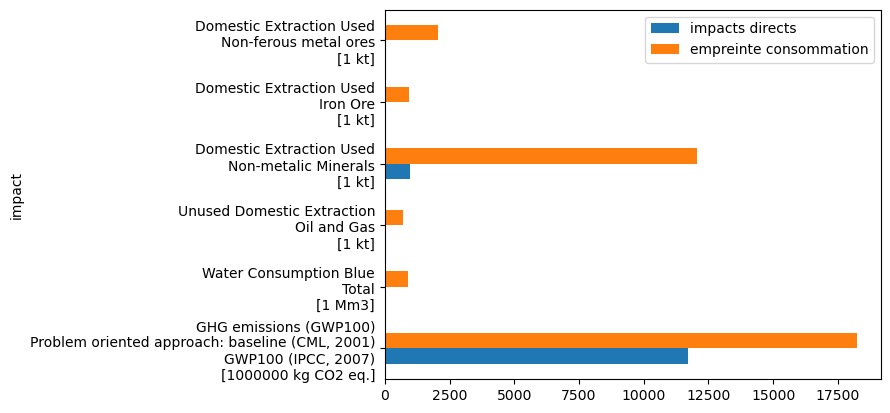

In [23]:
scale = pd.Series([1e6,1,1,1,1,1], index=indicateurs)
units = [f'{u[0]} [{s:.0f} {u[1]}]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

empreinte_LU = pd.concat([
    io.impacts.D_pba_reg.loc[indicateurs, 'LU'],
    io.impacts.D_cba_reg.loc[indicateurs, 'LU'],
], axis=1, keys=['impacts directs', 'empreinte consommation']).div(scale, axis=0)

ax = empreinte_LU.plot.barh()
ax.set_yticklabels(units)

## Comparaison extraction domestique/empreinte pour différents minerais

C:\Users\Gibon\AppData\Local\Temp\ipykernel_25888\1516201404.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empreinte_LU_formatted = empreinte_LU.applymap(lambda x: f'{x:.0f}')


<Axes: ylabel='stressor'>

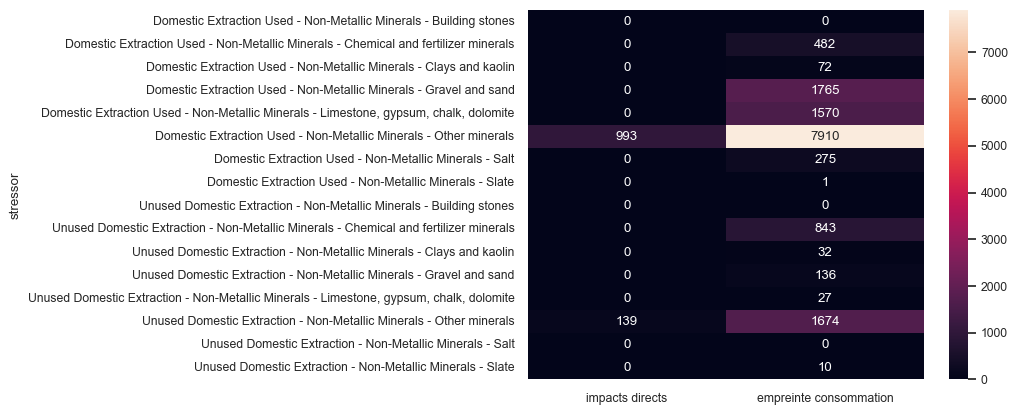

In [24]:
sns.set(font_scale=.8)

scale = pd.Series([1]*16, index=minerals)
units = [f'{u[0]} [{s:.0f} {u[1]}]' for u,s in zip(io.satellite.unit.loc[minerals,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

empreinte_LU = pd.concat([
    io.satellite.D_pba_reg.loc[minerals, 'LU'],
    io.satellite.D_cba_reg.loc[minerals, 'LU'],
], axis=1, keys=['impacts directs', 'empreinte consommation']).div(scale, axis=0)

# ax = empreinte_LU.plot.barh()
# ax.set_yticklabels(units)
empreinte_LU_formatted = empreinte_LU.applymap(lambda x: f'{x:.0f}')
sns.heatmap(empreinte_LU, annot=empreinte_LU_formatted, fmt='')

## Comparaison avec d'autres pays

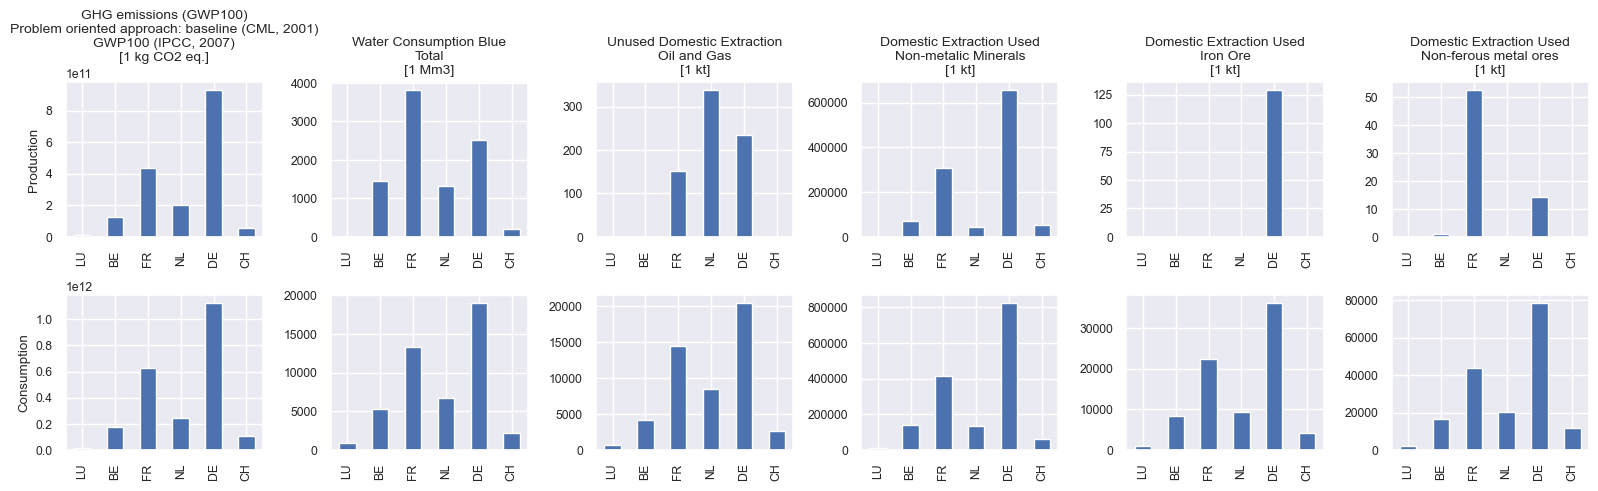

In [25]:
sns.set(font_scale=.8)

scale = pd.Series([1,1,1,1,1,1], index=indicateurs)
units = [f'{u[0]} [{s:g} {u[1]}]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

pays = ['LU', 'BE', 'FR', 'NL', 'DE', 'CH']

fig, ax = plt.subplots(2,len(indicateurs), figsize=(16,5))

for i, indicateur in enumerate(indicateurs):
    io.impacts.D_pba_reg.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[0,i])
    ax[0,i].set_title(units[i], fontsize=10)
    io.impacts.D_cba_reg.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[1,i])
    
ax[0,0].set_ylabel('Production')
ax[1,0].set_ylabel('Consumption')
plt.tight_layout()

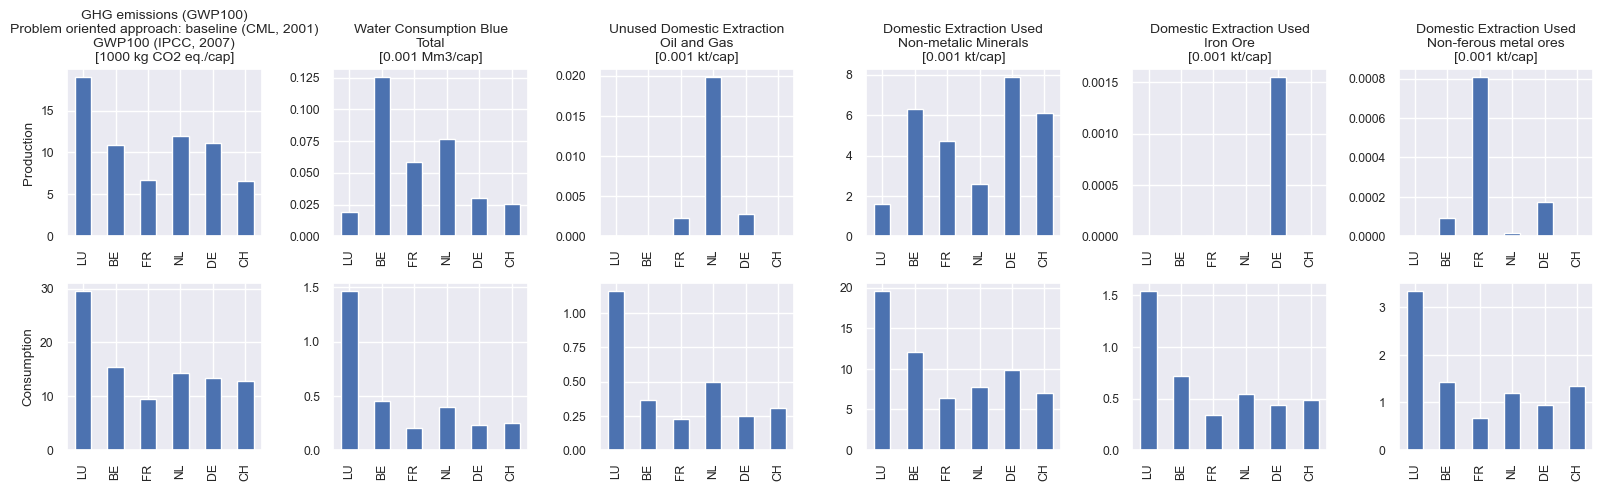

In [26]:
# Bien sûr, il serait plus pertinent de comparer les empreintes par personne

scale = pd.Series([1e3,1e-3,1e-3,1e-3,1e-3,1e-3], index=indicateurs)
units = [f'{u[0]} [{s:g} {u[1]}/cap]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

fig, ax = plt.subplots(2,len(indicateurs), figsize=(16,5))

for i, indicateur in enumerate(indicateurs):
    
    io.impacts.D_pba_cap.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[0,i])
    ax[0,i].set_title(units[i], fontsize = 10)
    io.impacts.D_cba_cap.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[1,i])

ax[0,0].set_ylabel('Production')
ax[1,0].set_ylabel('Consumption')
plt.tight_layout()

## Retracer l'origine d'une empreinte
La question typique est "Mais pourquoi le pays X consomme-t-il autant de ressource Y ?".

La formule pour le calcul qui nous intéresse est $$GHG_{cons pro LU}=\widehat{S_{GWP100}}L\widehat{y_{LU}}$$

In [27]:
# Isolons la demande du Luxembourg du reste
# La demande de tous les autres pays est définie à 0
Y_LU = io.Y['LU'].sum(1)

In [28]:
## Intéressons-nous d'abord aux émissions de GES
ind = 'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)'

# Déterminons le "parcours" des impacts à travers les transactions
GHG_cons_pro_LU = io.L.multiply(io.impacts.S.loc[ind],axis=0).multiply(Y_LU)

In [29]:
# Calcul des impacts directs (des ménages/de l'administration)
GHG_cons_pro_LU_Y = io.impacts.F_Y.loc[ind,'LU']

In [30]:
# Vérifions que le total...
GHG_cons_pro_LU.sum().sum() + GHG_cons_pro_LU_Y.sum()

18241355381.66245

In [31]:
# ...correspond bien aux rapports "consumption-based"
io.impacts.D_cba_reg.loc[ind,'LU']

18241355381.7

In [32]:
# Agrégeons tous les secteurs par pays
GHG_cons_pro_LU_reg = GHG_cons_pro_LU.groupby('region').sum().groupby('region', axis=1).sum()

C:\Users\Gibon\AppData\Local\Temp\ipykernel_25888\1087685652.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  GHG_cons_pro_LU_reg = GHG_cons_pro_LU.groupby('region').sum().groupby('region', axis=1).sum()


<Axes: xlabel='region', ylabel='region'>

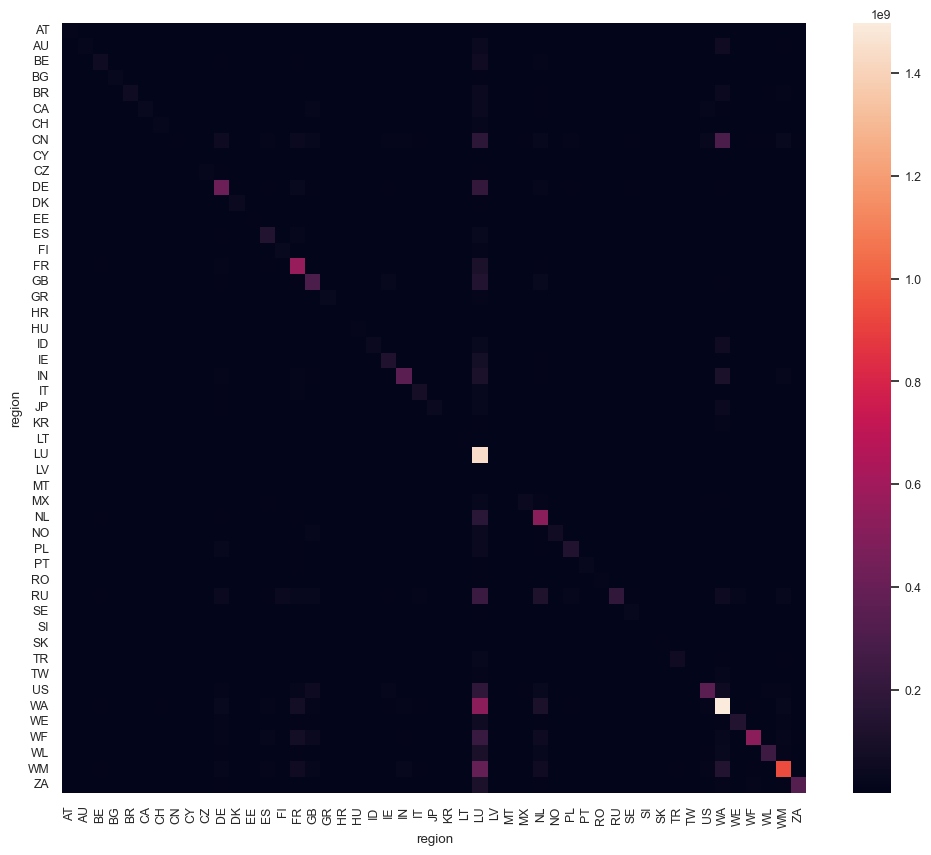

In [33]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(GHG_cons_pro_LU_reg, ax=ax)

Une telle matrice reste difficile à lire, nous allons voir comment l'agréger dans le notebook suivant.

<Axes: xlabel='region', ylabel='region'>

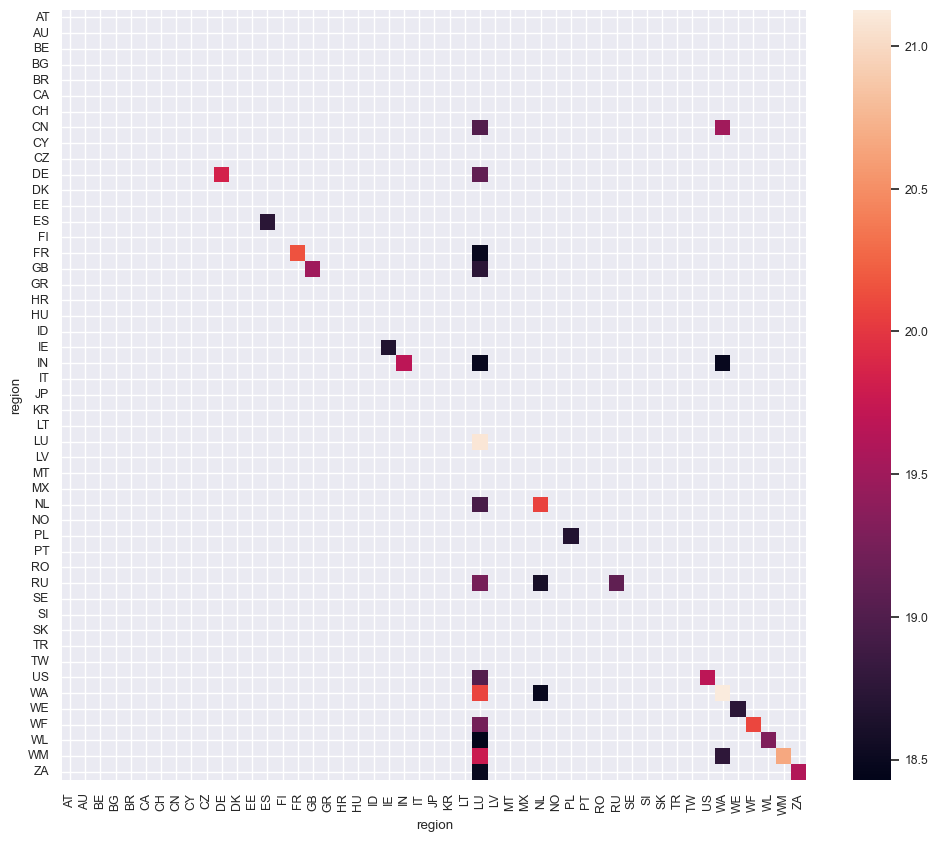

In [34]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(np.log(GHG_cons_pro_LU_reg[GHG_cons_pro_LU_reg>1e8]), ax=ax)

In [35]:
GHG_cons_pro_LU.loc[:,('TOTAL','TOTAL')] = GHG_cons_pro_LU.sum(1)
GHG_cons_pro_LU.loc[('TOTAL','TOTAL'),:] = GHG_cons_pro_LU.sum(0)

Affichons maintenant un résumé des échanges internationaux liés à la demande du Luxembourg les plus élevés. 

Ces échanges peuvent prendre place entre n'importe quel couple région 1-région 2, pas nécessairement au Luxembourg.

C:\Users\Gibon\AppData\Local\Temp\ipykernel_25888\4218654474.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  GHG_snap = GHG_cons_pro_LU.sort_values(('TOTAL','TOTAL'),axis=1,ascending=False).sort_values(('TOTAL','TOTAL'),ascending=False).iloc[:50,:20].drop('TOTAL').drop('TOTAL',axis=1)*1e-6


<Axes: xlabel='region-sector', ylabel='region-sector'>

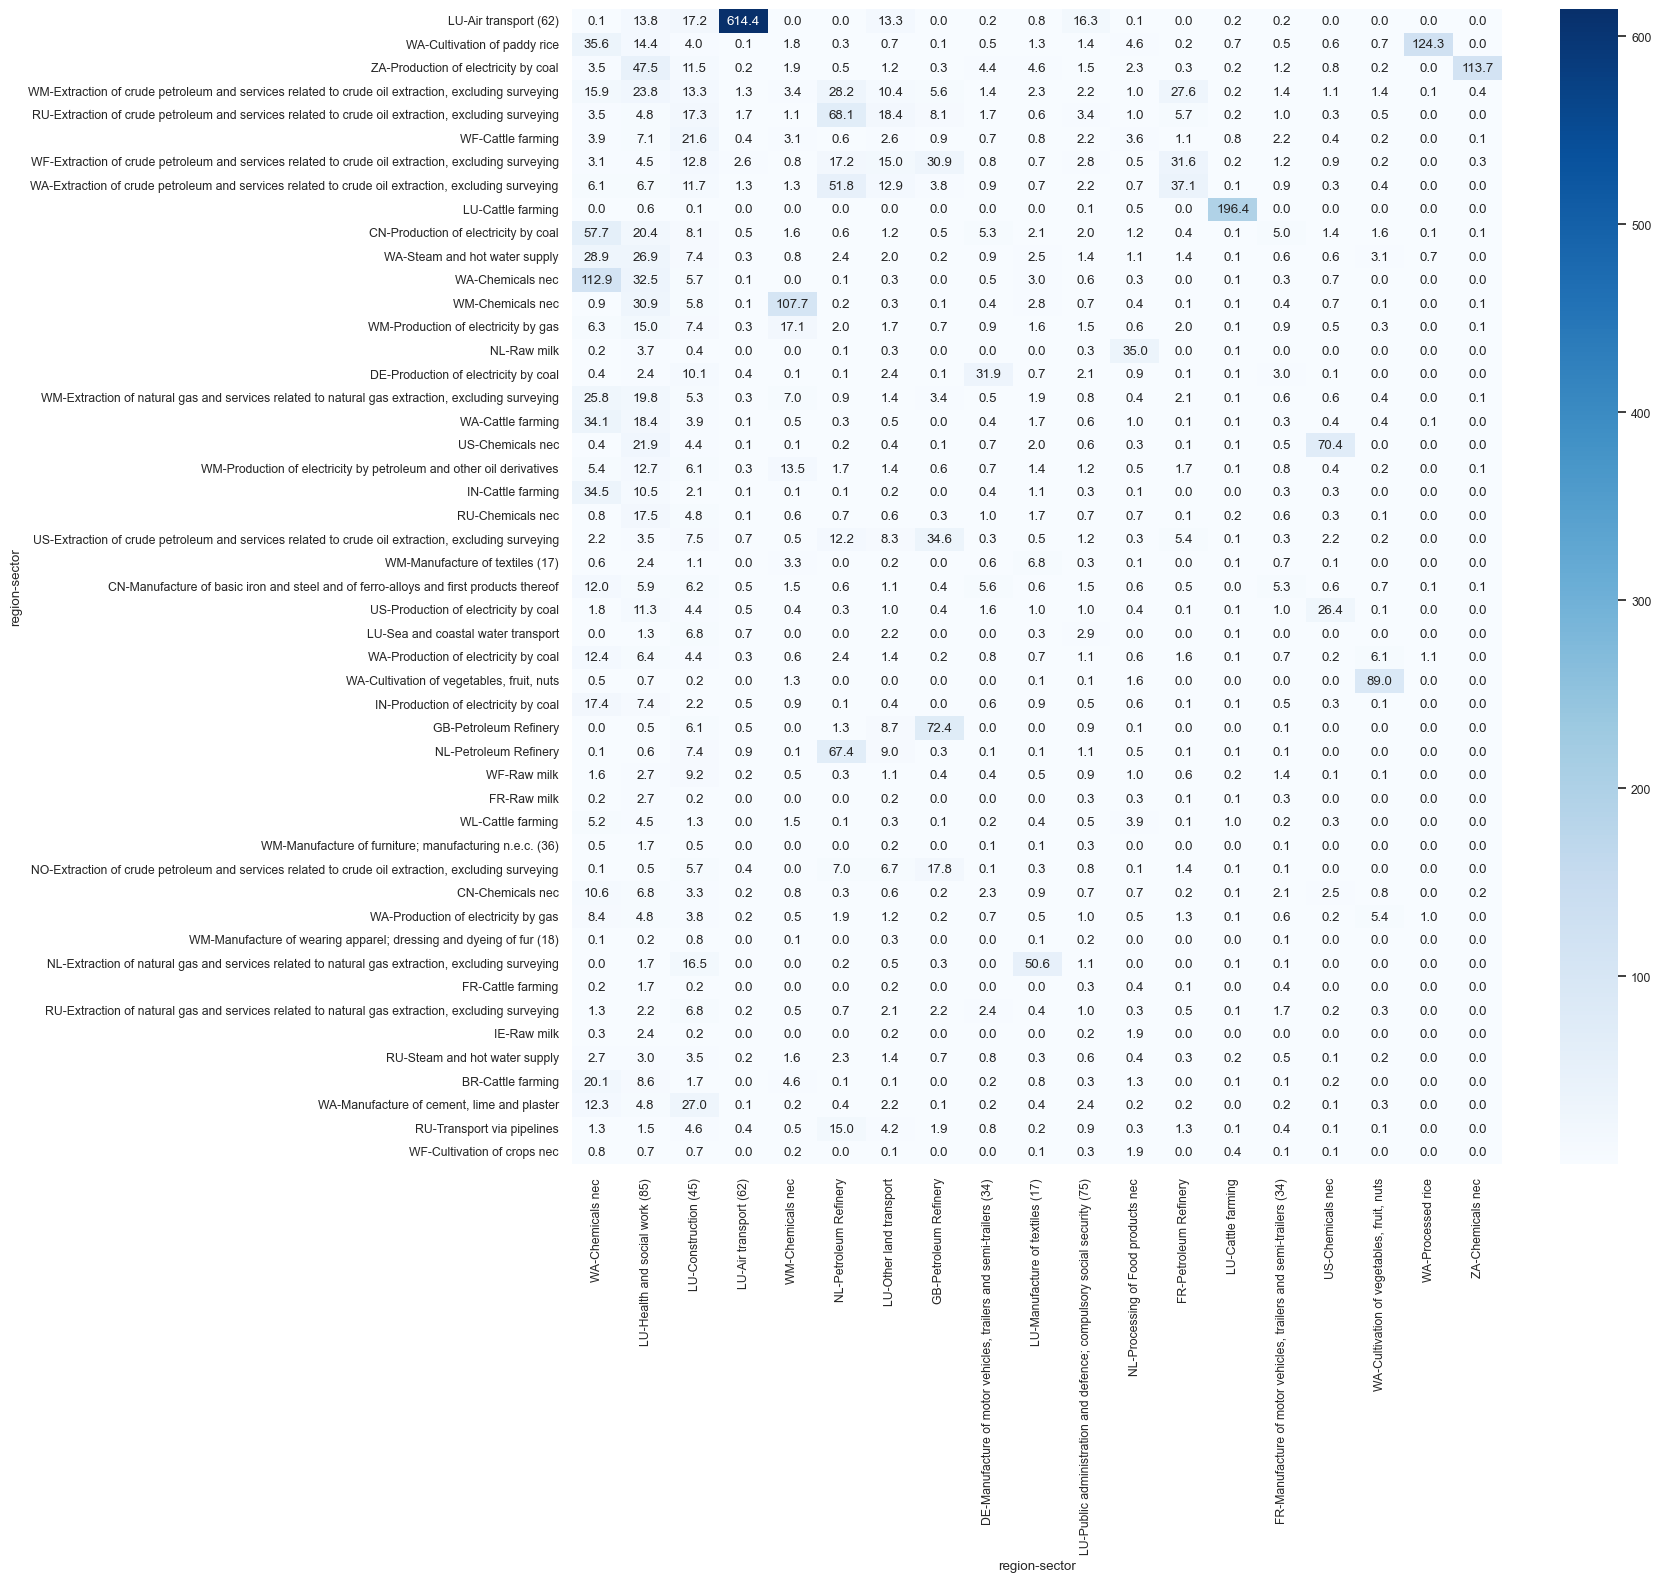

In [36]:
GHG_snap = GHG_cons_pro_LU.sort_values(('TOTAL','TOTAL'),axis=1,ascending=False).sort_values(('TOTAL','TOTAL'),ascending=False).iloc[:50,:20].drop('TOTAL').drop('TOTAL',axis=1)*1e-6
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(GHG_snap, annot=True,
#             norm=matplotlib.colors.LogNorm(vmin=1e-6,
#                                            vmax=GHG_snap.max().max()),
            cmap='Blues', fmt='.1f')